In [1]:

import pandas as pd
import matplotlib.pyplot as plt
#Perform consistency analysis of gait parameters between MoCap and Kinect
mo_sp_2m=pd.read_csv("\\Data_new\\Parameters\\MOCAP_2m\\spatio-temporal_parameters.csv")
ki_sp_2m=pd.read_csv("\\Data_new\\Parameters\\Kinect_2m\\spatio-temporal_parameters.csv")

In [2]:
#time01-go-task_normal of mocap

mo_time = mo_sp_2m.groupby('times')
mo_time01 = mo_time.get_group('time01')

mo_time01_process = mo_time01.groupby('process')
mo_time01_go  = mo_time01_process .get_group('go')

mo_time01_go_task = mo_time01_go.groupby('task')
mo_time01_go_normal = mo_time01_go_task.get_group('task_normal')


#time01-go-task_normal of kinect

ki_time = ki_sp_2m.groupby('times')
ki_time01 = ki_time.get_group('time01')

ki_time01_process = ki_time01.groupby('process')
ki_time01_go  = ki_time01_process .get_group('go')

ki_time01_go_task = ki_time01_go.groupby('task')
ki_time01_go_normal = ki_time01_go_task.get_group('task_normal')



In [3]:

import numpy as np
merged = pd.concat([mo_time01_go_normal, ki_time01_go_normal], ignore_index=True)
merged

,device,sample,times,process,task,step_length,stride_length,left_step_length,right_step_length,left_stride_length,right_stride_length,stride_speed,stride_time,step_width
0,MOCAP,sample01,time01,go,task_normal,0.443533,0.905961,0.481323,0.424638,0.956734,0.855188,1.724284,0.525000,0.195917
1,MOCAP,sample02,time01,go,task_normal,0.502135,0.977459,0.528947,0.448513,0.990560,0.964359,1.843998,0.535000,0.203430
2,MOCAP,sample03,time01,go,task_normal,0.446005,0.891643,0.445273,0.446370,0.945630,0.837656,1.665825,0.535000,0.196836
3,MOCAP,sample04,time01,go,task_normal,0.493515,1.017666,0.553275,0.433755,1.078936,0.987030,2.045034,0.496667,0.204073
4,MOCAP,sample05,time01,go,task_normal,0.487178,1.003519,0.545504,0.458015,1.018190,0.988847,1.913825,0.525000,0.209627
5,MOCAP,sample06,time01,go,task_normal,0.482001,0.941393,0.504610,0.436782,0.946440,0.936345,1.582355,0.595000,0.209350
6,MOCAP,sample07,time01,go,task_normal,0.565030,1.135720,0.576352,0.559369,1.149049,1.122391,2.231359,0.510000,0.228263
7,MOCAP,sample08,time01,go,task_normal,0.478976,0.972408,0.468029,0.489924,0.957953,1.001318,1.892645,0.513333,0.185654
8,MOCAP,sample09,time01,go,task_normal,0.439292,0.917330,0.495326,0.383257,0.994823,0.878583,1.704039,0.540000,0.186387
9,MOCAP,sample10,time01,go,task_normal,0.534840,1.069681,0.536206,0.533475,1.069681,0.000000,2.139362,0.500000,0.216352


In [4]:

from scipy import stats
mo_step_normal = np.array(mo_time01_go_normal['step_length']) 
ki_step_normal = np.array(ki_time01_go_normal['step_length']) 

step_st=stats.ttest_rel(mo_step_normal,ki_step_normal)

print(step_st)


print(np.mean(mo_step_normal).round(3),"±",np.std(mo_step_normal).round(3))
print(np.mean(ki_step_normal).round(3),"±",np.std(ki_step_normal).round(3))

TtestResult(statistic=10.895562629495211, pvalue=2.479590571555858e-10, df=22)
0.501 ± 0.036
0.378 ± 0.067


In [5]:

mo_speed_normal = np.array(mo_time01_go_normal['stride_speed'])  
ki_speed_normal = np.array(ki_time01_go_normal['stride_speed'])

speed_st=stats.ttest_rel(mo_speed_normal,ki_speed_normal)

print(speed_st)


print(np.mean(mo_speed_normal).round(3),"±",np.std(mo_speed_normal).round(3))
print(np.mean(ki_speed_normal).round(3),"±",np.std(ki_speed_normal).round(3))

TtestResult(statistic=10.973277817486078, pvalue=2.1706609504811953e-10, df=22)
1.942 ± 0.21
1.508 ± 0.24


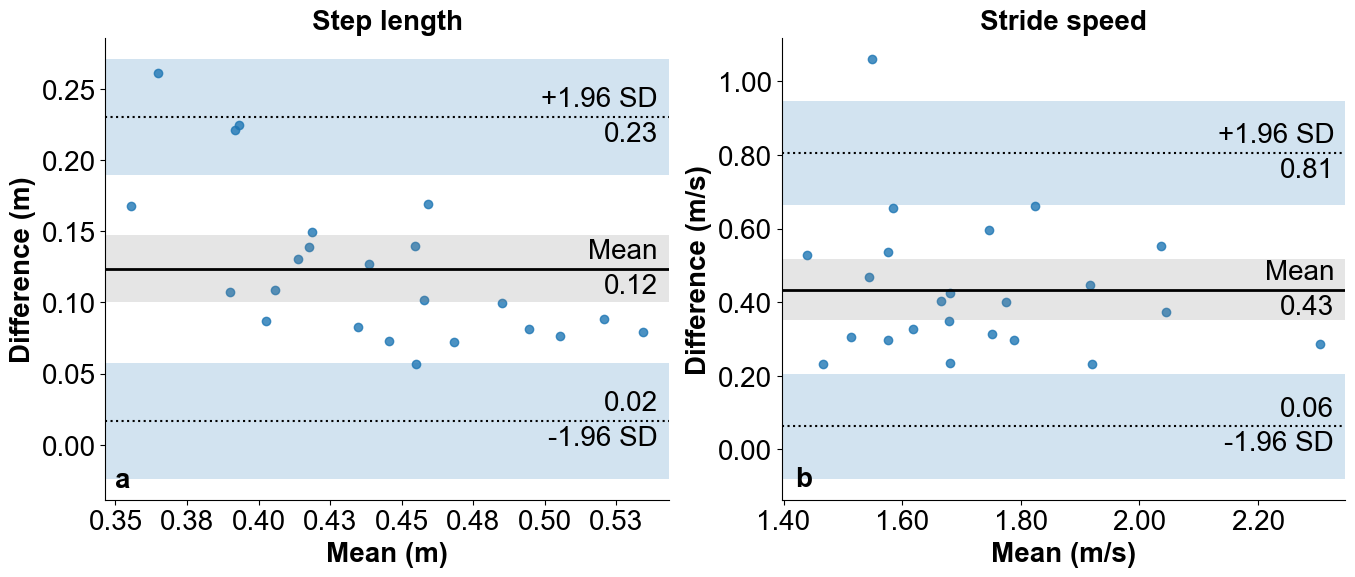

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pingouin as pg
# Plot Bland-Altman plot
data1 = np.array(mo_time01_go_normal['step_length']) 
data2 = np.array(ki_time01_go_normal['step_length']) 
data3 = np.array(mo_time01_go_normal['stride_speed'])  
data4 = np.array(ki_time01_go_normal['stride_speed']) 
custom_font = 'Arial'
plt.style.use('default')


plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
ax = pg.plot_blandaltman(data1, data2)
font_properties = {'fontsize': 20,'fontname': custom_font}

for text in ax.texts:
    text.set_fontsize(font_properties['fontsize'])
    text.set_fontname(font_properties['fontname'])

ax.set_xlabel('Mean (m)', fontsize=20,fontweight='bold',fontname=custom_font)
ax.set_ylabel('Difference (m)', fontsize=20,fontweight='bold',fontname=custom_font)
ax.set_title('Step length', fontsize=20,fontweight='bold',fontname=custom_font)

plt.xticks(fontsize=20, fontname=custom_font) 
plt.yticks(fontsize=20, fontname=custom_font) 
formatter = FormatStrFormatter('%.2f')
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.text(0.35,-0.03, 'a' ,fontsize=20,fontweight='bold',fontname=custom_font)

plt.subplot(1,2,2)
ax2 = pg.plot_blandaltman(data3, data4)

font_properties = {'fontsize': 20,'fontname': custom_font}


for text in ax2.texts:
    text.set_fontsize(font_properties['fontsize'])
    text.set_fontname(font_properties['fontname'])


ax2.set_xlabel('Mean (m/s)', fontsize=20,fontweight='bold',fontname=custom_font)
ax2.set_ylabel('Difference (m/s)', fontsize=20,fontweight='bold',fontname=custom_font)
ax2.set_title('Stride speed', fontsize=20,fontweight='bold',fontname=custom_font)
formatter = FormatStrFormatter('%.2f')
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
plt.xticks(fontsize=20, fontname=custom_font)  
plt.yticks(fontsize=20, fontname=custom_font)  
ax2.text(1.42,-0.1, 'b' ,fontsize=20,fontweight='bold',fontname=custom_font)
plt.show()